Ashwin Saji(240984006)

<a id="41"></a>
### Loading and Visualizing Data

In [1]:
import numpy as np
import pandas as pd 
 
# Importing the libraries
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
    
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [2]:
data = pd.read_csv('./international-airline-passengers.csv',skipfooter=5, engine='python') # skipfooter: son 5 satiri at
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


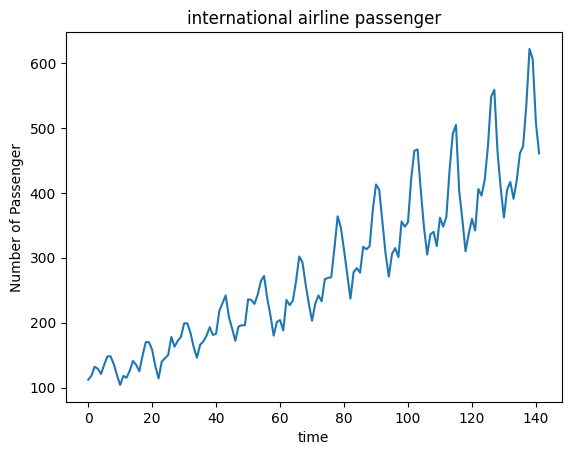

In [3]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

<a id="42"></a>
### Normalizing data

In [4]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(142, 1)

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = scaler.fit_transform(dataset)

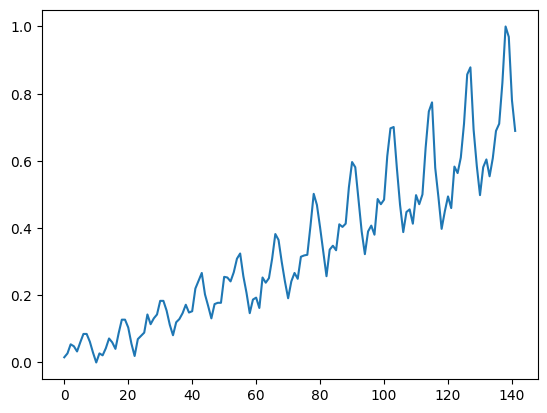

In [6]:
plt.plot(dataset_scaled)
plt.show()

In [7]:
train_size = int(len(dataset) * 0.60)
test_size = len(dataset) - train_size
train = dataset_scaled[0:train_size,:]
test = dataset_scaled[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 85, test size: 57 


In [8]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)  

In [9]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = np.array(dataX)
testY = np.array(dataY) 

In [10]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print('shape of trainX: ', trainX.shape)
print('shape of testX: ', testX.shape)

shape of trainX:  (74, 10, 1)
shape of testX:  (46, 10, 1)


<a id="43"></a>
### Create RNN Model

In [11]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#rnn model with 5 layers
rnn=Sequential([
    SimpleRNN(units = 100,activation='relu', return_sequences = True, input_shape = (trainX.shape[1], 1)),
    Dropout(0.2),
    SimpleRNN(units = 80,activation='relu', return_sequences = True),
    Dropout(0.2),
    SimpleRNN(units = 50,activation='relu', return_sequences = True),
    Dropout(0.2),
    SimpleRNN(units = 30,activation='relu', return_sequences = True),
    Dropout(0.2),
    SimpleRNN(units = 20),
    Dropout(0.2),
    Dense(units = 1)
])

#adam optimizer and mse loss fn
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

Training for 50 epochs

In [12]:
rnn.fit(trainX, trainY, epochs = 50, batch_size = 50)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0787
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0186
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0141
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0124
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0128
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0106
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0133
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0080
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0095
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0071
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0085
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0078
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0078
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0095
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0096
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━

Training for 100 epochs

In [13]:
rnn.fit(trainX, trainY, epochs = 100, batch_size = 50)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0046
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0042
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0052
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0046
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0040 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0047
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0045
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0057
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0055
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0039
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0054
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0046
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0041
Epoch 16/100
2/2 ━━

Training for 200 epochs


In [14]:
rnn.fit(trainX, trainY, epochs = 200, batch_size = 50)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0030
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0021
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0038
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0040
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0028
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0016
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0023
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0021
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0023
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0024
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0021
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0023
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0022
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0020
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025
Epoch 16/200
2/2 ━━

Predictions and Visualising RNN Model

In [15]:
import math 
from sklearn.metrics import mean_squared_error

trainPredict = rnn.predict(trainX)
testPredict = rnn.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
Train Score: 12.35 RMSE
Test Score: 32.60 RMSE


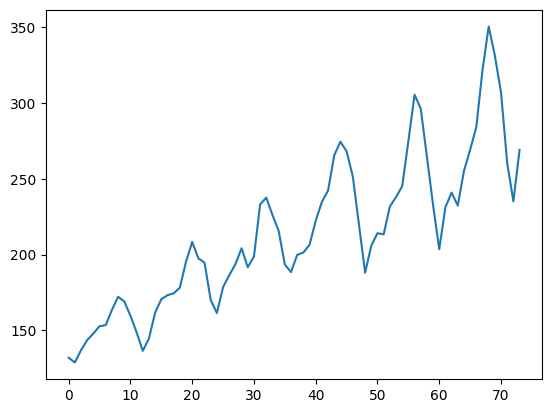

In [16]:
plt.plot(trainPredict)

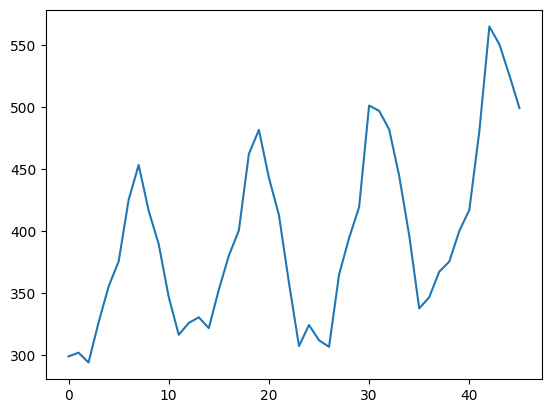

In [17]:
plt.plot(testPredict)

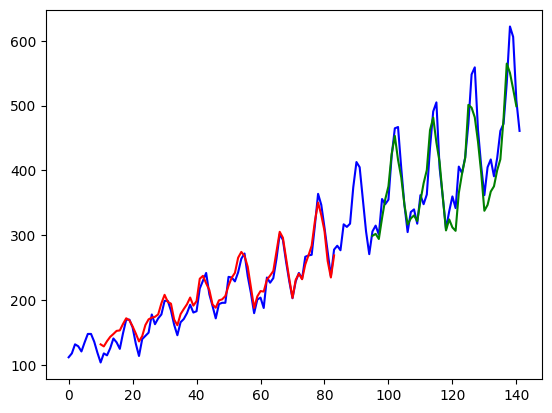

In [18]:
# shifting train
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset_scaled), color='b')
plt.plot(trainPredictPlot, color='r')
plt.plot(testPredictPlot, color='g')
plt.show()